# CMSC 320 Final Project 
Diego Ferreira, Lillian Mueller, Ananya Uniyal

Intro / overview of tutorial
EDIT THIS SECTION AS PARAGRAPHS LATER
- analyze crime trends between counties (which county is the safest/least safe), most common types of crimes in each county, how much each county spends per student, household in come of each county 
    - look at these trends separately 
    - then look at trends between different factors 
- to determine if wealth can be a predictor of crime rates 
    - wealth defined in two ways: 
        - spending per student in each county
        - median household income 
- based on the data we found online we will only be looking at the years 2017, 2018, 2019 

DATA INFO

do years 2019, 2018, and 2017

In [76]:
# PUT ALL PACKAGES HERE
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


# Step 1: Data Collection/Curation and Parsing

Step one focuses on collecting data from various sites. Here we will be reading in csv files from different databases as well as scraping some websites for data. 

The first step here is to download the csv from the Maryland's Open Data Portal (https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs). This dataset contains the violent and property crimes commited in Maryland by county in the years 1975 to Present (unfortunately the data is only availbe till 2019). Crime is divided into different categories:
1. Murder
2. Rape
3. Robbery
4. Aggrevated Assult
5. Breaking and Entering
6. Larceny Theft
7. Motorvechile theft

The populaiton of each county is also given for each year. We will be looking at crime rates per capita to generalize crime rates over all counties. 

DESCRIBE THE CODE BELOW IN DETAIL & INCLDUE LINKS TO WEBSITES TO LEARN MORE LIKE THE CP CRIMES EXAMPLE?
RUBRIC SAYS TO INCLUDE "Links to external documentation and resources that would be useful in
understanding the approach." 

Process of creating the crime_df 
1. Download CSV from https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs and upload this CSV file into github so it can be publicly accessed. 
2. 
- extract data and put into dataframe 

In [77]:
# CRIME DATA
# read csv file uploaded on github
crime_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Violent_Crime___Property_Crime_by_County__1975_to_Present%20(2).csv")

# contains raw data
crime_data

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,Worcester County,2015,51566,1,15,27,102,273,1562,28,...,529.4,3029.1,54.3,0.4,7.5,-22.6,-26.9,-38.4,-10.6,-26.0
1076,Worcester County,2016,51255,3,17,39,93,289,1514,32,...,563.8,2953.9,62.4,201.8,14.0,45.3,-8.3,6.5,-2.5,15.0
1077,Worcester County,2017,51408,2,26,43,106,220,1514,39,...,427.9,2945.1,75.9,-33.5,52.5,9.9,13.6,-24.1,-0.3,21.5
1078,Worcester County,2018,51304,0,12,24,88,215,1178,34,...,419.1,2296.1,66.3,-100.0,-53.8,-44.1,-16.8,-2.1,-22.0,-12.6


Downloaded CSV from https://opendata.maryland.gov/Demographic/Maryland-Median-Household-Income-By-Year-With-Marg/bvk4-qsxs

In [78]:
# MEDIAN HOUSEHOLD INCOME DATA

# Read CSV for median household income 
income_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2010-2019%20(1).csv")
income_data


,Date created,Year,Data,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,"September 29, 2020",2010,Income,68933,37083,80908,38186,62300,86536,55480,...,49017,88559,69524,78503,38134,81559,56806,51610,47702,55492
1,"September 29, 2020",2010,MOE,833,2826,2311,1414,2006,5064,2965,...,4582,2710,1609,5181,2747,5070,3948,3327,3097,3507
2,"September 29, 2020",2011,Income,70075,38504,82980,38478,62309,88406,50809,...,49795,92288,70114,75158,35426,80943,55145,52028,45788,48472
3,"September 29, 2020",2011,MOE,760,2693,3430,1536,1728,4369,4213,...,4603,2758,1911,6363,3426,2717,4929,2928,3582,4653
4,"September 29, 2020",2012,Income,71169,38670,87083,39077,62413,87215,48772,...,49969,94365,69258,79012,34454,85478,61529,52604,50204,55875
5,"September 29, 2020",2012,MOE,563,2029,3291,1141,1525,5416,2516,...,4111,2225,1833,5793,2984,2183,4056,2636,1957,2545
6,"September 29, 2020",2013,Income,72482,39994,85685,41988,64624,91993,46015,...,55695,97873,71682,80143,36106,78274,57525,55643,47536,52276
7,"September 29, 2020",2013,MOE,693,2773,2352,1071,1944,5241,3787,...,3753,1836,1380,4946,3399,5169,5176,2999,3167,3420
8,"September 29, 2020",2014,Income,73851,39808,86654,41895,67766,92446,49573,...,53288,97279,71904,80650,38376,84686,54836,54606,51927,55691
9,"September 29, 2020",2014,MOE,824,2380,2647,1798,2261,6251,2996,...,4924,2223,1447,5287,2958,3891,4308,2953,2234,3253


DESCRIBE CODE AND DATA
Links
https://conduitstreet.mdcounties.org/2018/02/21/chart-compares-school-funding-per-student-county-by-county/
https://conduitstreet.mdcounties.org/2019/02/20/funding-per-pupil-charts-for-2019/

In [79]:
# LOCAL FUNDING PER PUPIL

# Read CSV for median household income 
funding_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Local%20Funding%20for%20Public%20Schools%20Per%20Pupil.csv")
funding_data

,County,Year,Local Funding Per Pupil
0,Worcester County,2018,13256
1,Montgomery County,2018,10599
2,Howard County,2018,10321
3,Kent County,2018,9236
4,Talbot County,2018,8621
5,Anne Arundel County,2018,8431
6,Calvert County,2018,7808
7,Carroll County,2018,7492
8,Garrett County,2018,7483
9,Queen Anne's County,2018,7384


# Step 2: Data Management and Representation

Here we organize the data/clean it up

ADD Description of code below

In [80]:
# Cleaning up violent crime data

# only looking at years 2017, 2018, 2019
years = [2017, 2018, 2019]
# create separate dataframes for crime in 2017, 2018, and 2019
crime_17 = crime_data[crime_data.YEAR.eq(2017)]
crime_18 = crime_data[crime_data.YEAR.eq(2018)]
crime_19 = crime_data[crime_data.YEAR.eq(2019)]

# merge all three dataframes
crime_df = pd.concat([crime_17, crime_18, crime_19])


# only keep first 19 columns of the dataframe since this is the only relevant information needed
crime_df = crime_df.iloc[:, :19]

# remove the percent change and individual crime total columns since this data is not needed for our analysis
crime_df = crime_df.drop(columns = ['PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS', 'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE'])

# reset dataframe index so it starts at 0
crime_df = crime_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

crime_df


,index,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,GRAND TOTAL,"OVERALL CRIME RATE PER 100,000 PEOPLE"
0,40,Allegany County,2017,71616,4,14,58,168,469,1724,46,2483,3467.1
1,87,Anne Arundel County,2017,572990,21,172,629,1433,1729,9388,667,14039,2450.1
2,132,Baltimore City,2017,613217,342,385,5926,5874,8056,17365,5184,43132,7033.7
3,177,Baltimore County,2017,834727,35,326,1536,3166,3128,18178,2029,28398,3402.1
4,222,Calvert County,2017,91587,2,12,14,79,151,743,57,1058,1155.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,899,St. Mary's County,2019,112993,1,29,46,155,333,1476,71,2111,1868.3
68,944,Talbot County,2019,36673,1,13,11,52,73,382,9,541,1475.2
69,989,Washington County,2019,150576,3,43,118,333,531,1596,151,2775,1842.9
70,1034,Wicomico County,2019,103219,1,36,77,312,392,1925,89,2832,2743.7


In [81]:
# MEDIAN HOUSEHOLD INCOME DATA CLEANUP

# remove all margin of error rows 
income_df = income_data[income_data['Data'] == 'Income']
income_df

# remove "Data" "MARYLAND", AND "Date Created" columns

income_df = income_df.drop(columns = ['Date created', 'Data', 'MARYLAND'])


# only keep rows for years 2017, 2018, and 2019
income_17 = income_df[income_df['Year'] == 2017]
income_18 = income_df[income_df['Year'] == 2018]
income_19 = income_df[income_df['Year'] == 2019]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_17 = income_17.T
# delete year column
income_17 = income_17.iloc[1:, :]
# rename column to income
income_17.rename(columns = {14:'Income'}, inplace = True)
# add year column 
income_17 = income_17.assign(Year='2017')[['Year'] + income_17.columns.tolist()]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_18 = income_18.T
# delete year column
income_18 = income_18.iloc[1:, :]
# rename column to income
income_18.rename(columns = {16:'Income'}, inplace = True)
# add year column 
income_18 = income_18.assign(Year='2018')[['Year'] + income_18.columns.tolist()]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_19 = income_19.T
# delete year column
income_19 = income_19.iloc[1:, :]
# rename column to income
income_19.rename(columns = {18:'Income'}, inplace = True)
# add year column 
income_19 = income_19.assign(Year='2019')[['Year'] + income_19.columns.tolist()]

# merge all three dataframes
income_df = pd.concat([income_17, income_18, income_19])
income_df.reset_index(inplace=True)
income_df.rename(columns = {'index':'County'}, inplace = True)

income_df

,County,Year,Income
0,Allegany County,2017,42564
1,Anne Arundel County,2017,96133
2,Baltimore City,2017,46762
3,Baltimore County,2017,73309
4,Calvert County,2017,100000
...,...,...,...
67,St. Mary's County,2019,89123
68,Talbot County,2019,75714
69,Washington County,2019,59785
70,Wicomico County,2019,54351


In [82]:
# FUNDING DATA CLEANUP

funding_data = funding_data.sort_values(by=['Year', 'County'])
funding_data.reset_index(inplace=True)
funding_df = funding_data
funding_df = funding_df.drop(columns = ['index'])

funding_df
print("hi")

,County,Year,Local Funding Per Pupil
0,Allegany County,2018,3714
1,Anne Arundel County,2018,8431
2,Baltimore City,2018,3645
3,Baltimore County,2018,7208
4,Calvert County,2018,7808
5,Caroline County,2018,2596
6,Carroll County,2018,7492
7,Cecil County,2018,5525
8,Charles County,2018,6728
9,Dorchester County,2018,4220


# Part 3: Exploratory data analysis

['Allegany County' 'Anne Arundel County' 'Baltimore City'
 'Baltimore County' 'Calvert County' 'Caroline County' 'Carroll County'
 'Cecil County' 'Charles County' 'Dorchester County' 'Frederick County'
 'Garrett County' 'Harford County' 'Howard County' 'Kent County'
 'Montgomery County' "Prince George's County" "Queen Anne's County"
 'Somerset County' "St. Mary's County" 'Talbot County' 'Washington County'
 'Wicomico County' 'Worcester County']


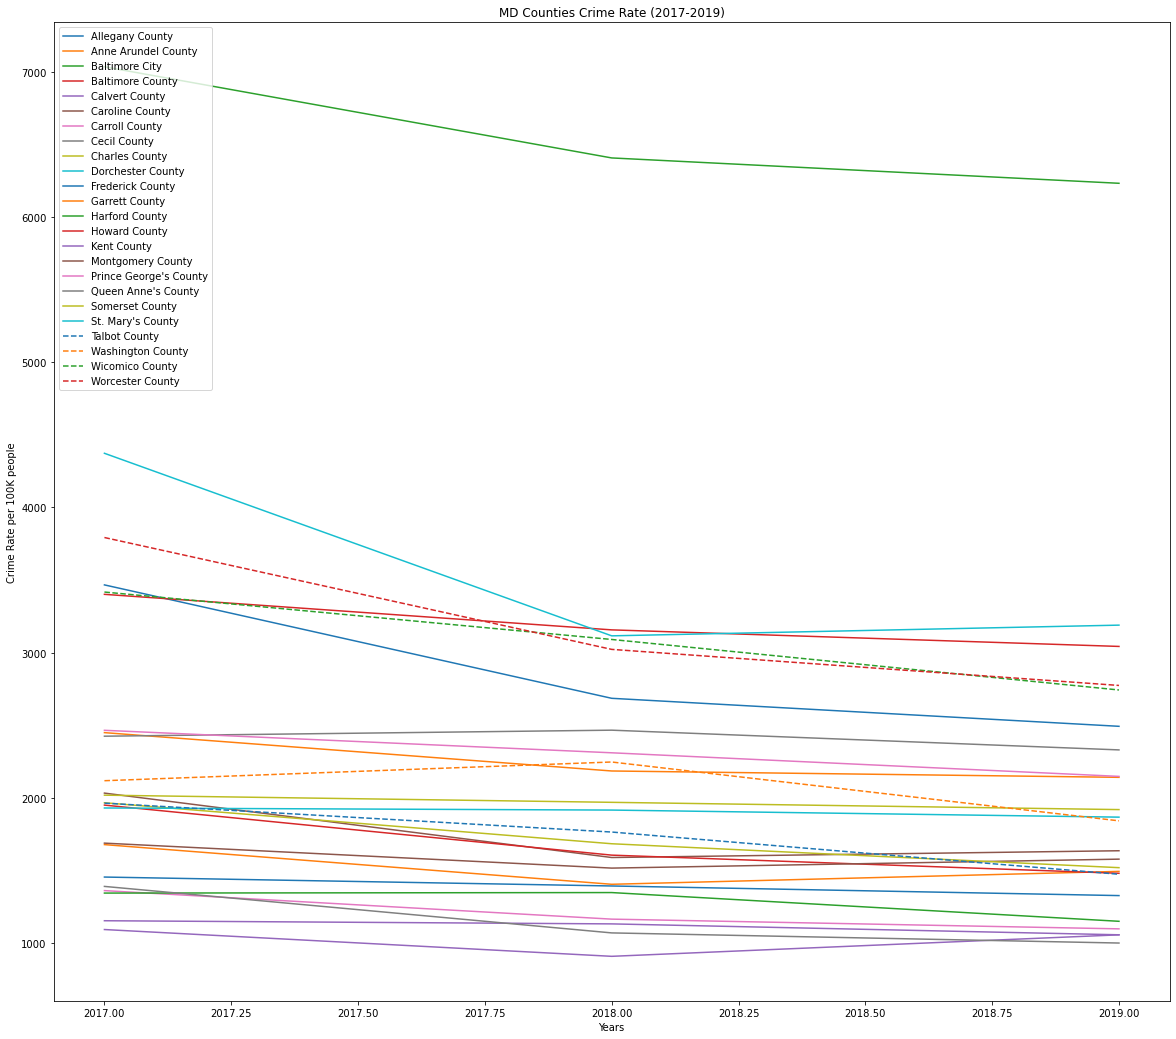

In [83]:
# Plot years vs overall crime rate

years = [2017, 2018, 2019]
county_names = crime_df.JURISDICTION.unique()
county_names_first_20 = county_names[: -4]
print(county_names)
repeat_county = ['Talbot County', 'Washington County', 'Wicomico County', 'Worcester County']

plt.figure(figsize=(20,18))
for curr_county in county_names_first_20:
    # dataframe for current county data
    curr_county_crime = crime_df[crime_df['JURISDICTION'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_crime['YEAR'].to_numpy()
    curr_crime = curr_county_crime['OVERALL CRIME RATE PER 100,000 PEOPLE'].to_numpy()
    plt.title('MD Counties Crime Rate (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Crime Rate per 100K people')
    plt.plot(curr_years, curr_crime, label = curr_county)
    
for curr_county in repeat_county:
    # dataframe for current county data
    curr_county_crime = crime_df[crime_df['JURISDICTION'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_crime['YEAR'].to_numpy()
    curr_crime = curr_county_crime['OVERALL CRIME RATE PER 100,000 PEOPLE'].to_numpy()
    plt.title('MD Counties Crime Rate (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Crime Rate per 100K people')
    plt.plot(curr_years, curr_crime, linestyle='dashed')
    
plt.legend(county_names, loc = "upper left")
plt.show()

ADD EXPLANATION ABOUT TRENDS

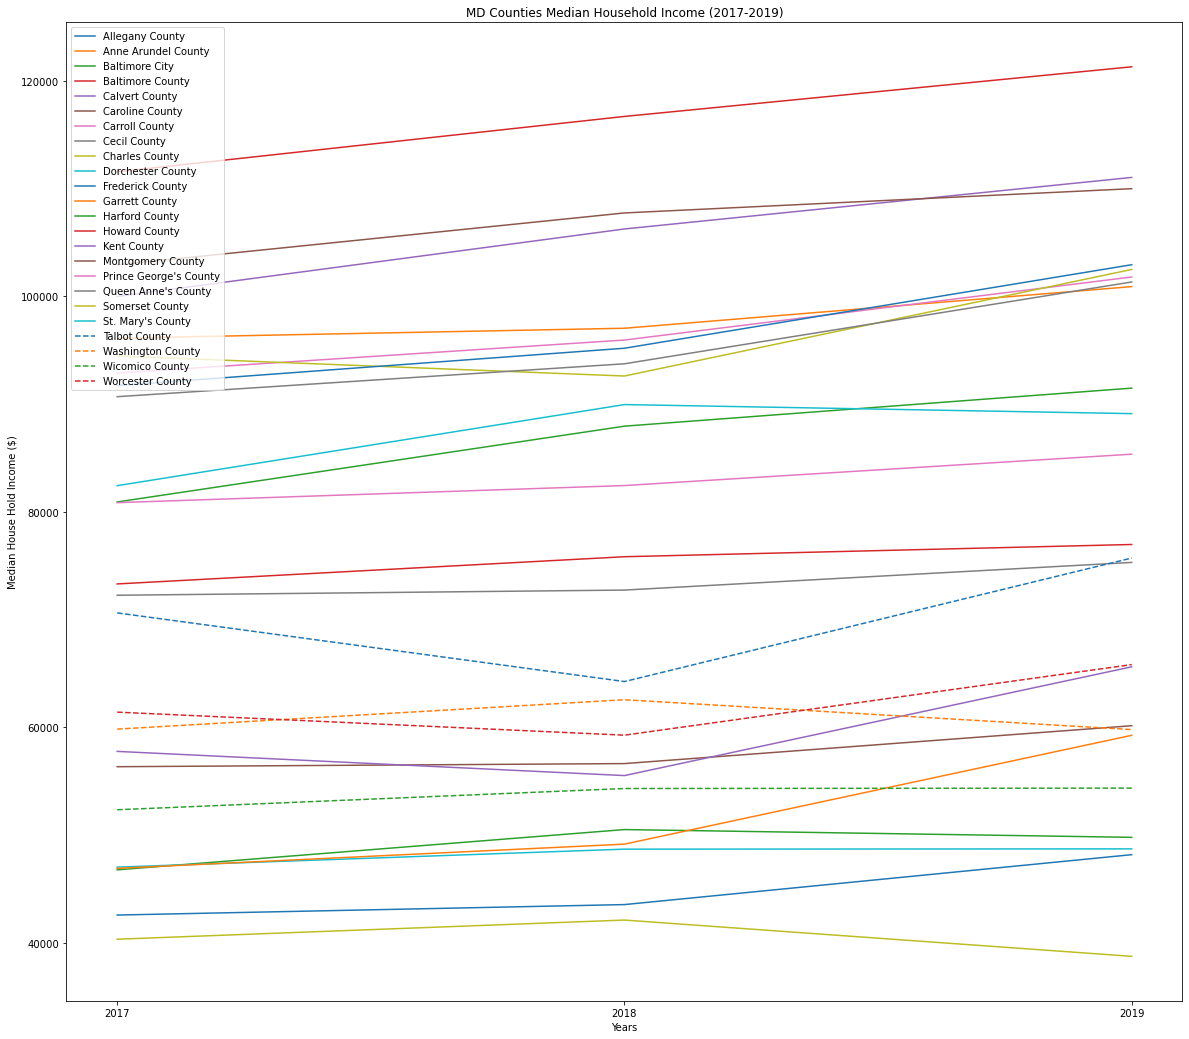

In [84]:
# Plot years vs median household income

years = [2017, 2018, 2019]
county_names = income_df.County.unique()

county_names_first_20 = county_names[: -4]
#print(county_names_first_20)
repeat_county = ['Talbot County', 'Washington County', 'Wicomico County', 'Worcester County']

plt.figure(figsize=(20,18))
for curr_county in county_names_first_20:
    # dataframe for current county data
    curr_county_income = income_df[income_df['County'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_income['Year'].to_numpy()
    curr_income = curr_county_income['Income'].to_numpy()
    plt.title('MD Counties Median Household Income (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Median House Hold Income ($)')
    plt.plot(curr_years, curr_income, label = curr_county)
    
for curr_county in repeat_county:
    # dataframe for current county data
    curr_county_income = income_df[income_df['County'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_income['Year'].to_numpy()
    curr_income = curr_county_income['Income'].to_numpy()
    plt.title('MD Counties Median Household Income (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Median House Hold Income ($)')
    plt.plot(curr_years, curr_income, linestyle='dashed')
    
plt.legend(county_names, loc = "upper left")
plt.show()